In [1]:
#pip install planet

In [506]:
%matplotlib inline

from pprint import pprint
import numpy as np
import pandas as pd
from planet import api

from datetime import datetime
from dateutil import parser
from matplotlib.dates import date2num, num2date

import matplotlib.colors
import matplotlib.pyplot as plt
plt.rc('axes.formatter', useoffset=False)

from pysurvey.plot import setup_sns as setup, dateticks



# California Coast Line

In [354]:
import shapefile
from mpl_toolkits.basemap import Basemap

In [418]:
# !ogr2ogr /Users/ajmendez/tmp/world/ca_latlon_simple.shp \
#          /Users/ajmendez/tmp/world/ca_latlon.shp \
#          -simplify 0.0001

In [429]:
#ogr2ogr -t_srs world.proj ca_latlon.shp ca_county/shapefiles/cnty24k09_1_line.shp
shp = shapefile.Reader('/Users/ajmendez/tmp/world/ca_latlon_simple.shp')
# shp = shapefile.Reader('/Users/ajmendez/tmp/world/ca_latlon.shp')
# shp = shapefile.Reader('/Users/ajmendez/tmp/world/ca_poly_latlon.shp')

380


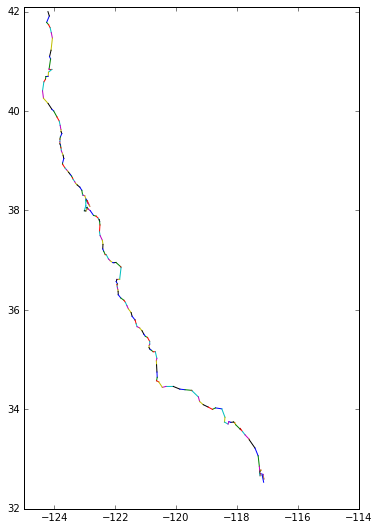

In [430]:
plt.figure(figsize=(6,9))
plt.xlim(-125, -114)
plt.ylim(32, 42.1)
points = []
for item in shp.iterShapeRecords():
    if item.record[0] not in ['COAST']:
        continue
    x,y = zip(*item.shape.points)
    points.extend(item.shape.points)
    plt.plot(x,y)
print len(points)

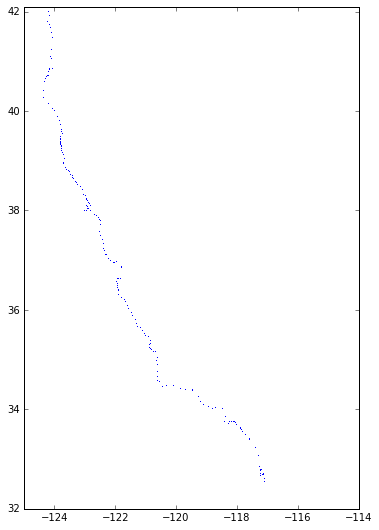

In [431]:
plt.figure(figsize=(6,9))
plt.xlim(-125, -114)
plt.ylim(32, 42.1)
x,y = zip(*points)
plt.plot(x,y, ',')
#     break
#     for i,j in zip(shape.parts, shape.parts[1:]):
#         x,y = zip(*shape.points[i:j])
#         plt.plot(x,y)

In [363]:
np.save('/Users/ajmendez/tmp/world/coast_points.np',points)

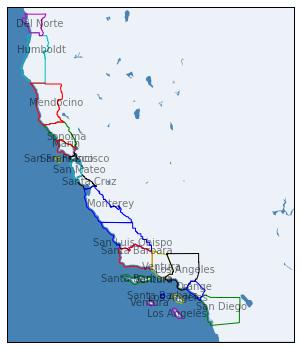

In [105]:

bbox = dict(north=42.2, west=-125, 
            south=32, east=-114)

plt.figure(figsize=(12,6))
m = Basemap(projection='merc',
            llcrnrlat=bbox['south'],urcrnrlat=bbox['north'],
            llcrnrlon=bbox['west'],urcrnrlon=bbox['east'],
            lat_ts=20,resolution='h')
m.drawmapboundary(fill_color='steelblue')
m.fillcontinents(color=(1,1,1,0.9),
                 lake_color='steelblue', zorder=-2)
# m.drawcoastlines()
# m.drawcountries()
# m.drawcoastlines()
# counties = m.drawcounties(linewidth=0.5)

shpfile = '/Users/ajmendez/tmp/world/california/County/CaliforniaCounty.shp'
m.readshapefile(shpfile.replace('.shp',''), 
                'counties', drawbounds=False)

costal_counties = [
    'Del Norte',
    'Humboldt',
    'Mendocino',
    'Sonoma',
    'Monterey',
    'Marin',
    'San Francisco',
    'San Mateo',
    'Santa Cruz',
    'San Luis Obispo',
    'Santa Barbara',
    'Ventura',
    'Los Angeles',
    'Orange',
    'San Diego',
]

for shape, record in zip(m.counties, m.counties_info):
    x,y = zip(*shape)
    name = record['NAME']
#     plt.text(np.mean(x), np.mean(y), name, ha='center', va='center')
    if name in costal_counties:
        plt.plot(x,y)
        plt.text(np.mean(x), np.mean(y), name, ha='center', va='center', alpha=0.5)

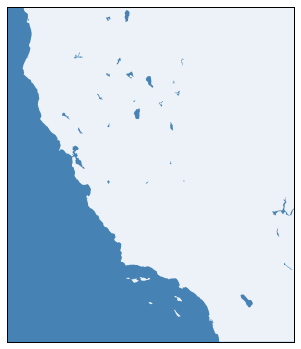

In [128]:

bbox = dict(north=42.2, west=-125, 
            south=32, east=-114)

plt.figure(figsize=(12,6))
m = Basemap(projection='merc',
            llcrnrlat=bbox['south'],urcrnrlat=bbox['north'],
            llcrnrlon=bbox['west'],urcrnrlon=bbox['east'],
            lat_ts=20,resolution='h')
m.drawmapboundary(fill_color='steelblue')
m.fillcontinents(color=(1,1,1,0.9),
                 lake_color='steelblue', zorder=-2)
# m.drawcoastlines()
# m.drawcountries()
# m.drawcoastlines()
# counties = m.drawcounties(linewidth=0.5)

shpfile = '/Users/ajmendez/tmp/world/ca_latlon.shp'
m.readshapefile(shpfile.replace('.shp',''), 'counties', drawbounds=False)

for shape, record in zip(m.counties, m.counties_info):
    x,y = zip(*shape)
    name = record['TYPE']
    if name in ['COASTLINE']:
        plt.plot(x,y)

In [130]:
for shape, record in zip(m.counties, m.counties_info):
    x,y = zip(*shape)
    name = record['TYPE']
    if name in ['COASTLINE']:
        plt.plot(x,y)

# planet labs

In [355]:
import json

In [366]:
client = api.Client()

In [166]:
body = client.get_scenes_list(scene_type='ortho')

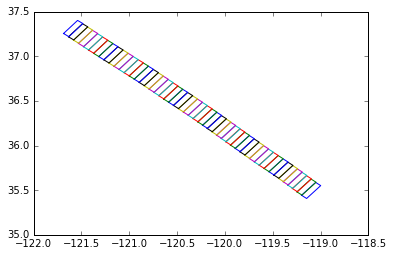

In [167]:
for x in body:
    item = json.loads(x)
    for f in item['features']:
        x,y = zip(*[[x,y] 
                    for c in f['geometry']['coordinates'] 
                    for x,y in c])
        plt.plot(x,y)
    
#     pprint(item)
#     break

In [225]:
# !planet search \
# '{"type":"Point","coordinates":[-123.79394531249999,39.291797043774864]}' \
# -s ortho \
# --where image_statistics_image_quality gte target \
# --where acquired gte "2009-01-01T08:00:00.000Z" \
# --where cloud_cover.estimated gte 0 \
# --where cloud_cover.estimated lte 100 \
# --where image_statistics.gsd gte 1 \
# --where image_statistics.gsd lte 30 \
# --where sat.off_nadir lte 62 \
# --where published gte "2013-09-01T07:00:00.000Z"


In [278]:
wkt = 'POINT(-123.79394531249999 39.291797043774864)'
wkt = '{"type":"Point","coordinates":[-123.79394531249999,39.291797043774864]}'
wkt = '{ "type": "Point", "coordinates": [-122.42859,37.46355] }'
wkt = {"type":"Polygon","coordinates":[[[-122.512600008261,37.31165299242011],[-122.512600008261,37.555133009981006],[-122.310771990294,37.555133009981006],[-122.310771990294,37.31165299242011],[-122.512600008261,37.31165299242011]]]}
filters = {
    'sat.off_nadir.leq': 62,
    'image_statistics.gsd.gte': 1,
    'image_statistics.gsd.lte': 30,
    'image_statistics_image_quality.gte':'target',
    'cloud_cover.estimated.gte': 0,
    'cloud_cover.estimated.lte': 10,
    'published.gte':"2013-09-01T00:00:00.000Z",
#     'acquired.gte':"2009-01-01T08:00:00.000Z",
    'acquired.gte':"2015-01-01T00:00:00.000Z",
    
    
}
body = client.get_scenes_list(scene_type='ortho', 
                              product='visual',
                              intersection=wkt, 
                              order_by='acquired desc',
                              filters=filters, 
                              counts=100)
for s in body:
    item = json.loads(s)
    pprint( set([f['id'].split('_')[0] 
                 for f in item['features']]))

set([u'20160710'])


In [338]:
# client.set_workspace(id='halfmoonbay')
workspace = client.get_workspaces().get()
# client.set_workspace(workspace[0]).get()

In [334]:
workspace[0]

{u'filters': {u'acquired': {u'gte': u'2009-01-01T08:00:00.000Z'},
  u'cloud_cover.estimated': {u'gte': 0.0, u'lte': 40.0},
  u'geometry': {u'intersects': {u'coordinates': [[[-122.53017425537108,
       37.48698192470752],
      [-122.47421264648439, 37.47662910559184],
      [-122.46768951416016, 37.41802693231884],
      [-122.43541717529295, 37.35774151874266],
      [-122.42408752441405, 37.213104934312355],
      [-122.37808227539061, 37.213104934312355],
      [-122.36709594726561, 37.37206710407574],
      [-122.39524841308592, 37.42334390593082],
      [-122.45223999023435, 37.51653405171555],
      [-122.47970581054683, 37.55029358651352],
      [-122.46459960937496, 37.63353799897018],
      [-122.52777099609371, 37.65202410998995],
      [-122.56347656249996, 37.50509590623102],
      [-122.53017425537108, 37.48698192470752]]],
    u'type': u'Polygon'}},
  u'image_statistics.gsd': {u'gte': 1.0, u'lte': 18.7},
  u'image_statistics.image_quality': {u'gte': 2.0},
  u'provider': 

In [339]:
items = client.get_scenes_list(workspace=workspace[0]['id']).get()
[f['id'] for f in items['features']]

[u'20160314_162139_0b0a',
 u'20160227_224705_0b07',
 u'20160227_224704_0b07',
 u'20160221_181413_0b0a',
 u'20160221_181412_1_0b0a',
 u'20160213_212517_0b07',
 u'20160213_212516_0b07',
 u'20160213_212149_0b0d',
 u'20160213_212148_0b0d',
 u'20160208_232813_0b0a',
 u'20160208_232812_0b0a',
 u'20160112_173212_0b0b',
 u'20160112_173211_0b0b',
 u'20160112_173210_0b0b',
 u'20160112_173209_1_0b0b',
 u'20151111_183517_0b0b',
 u'20151111_183515_0b0b',
 u'20151111_183057_0c03',
 u'20151102_221023_0b1f']

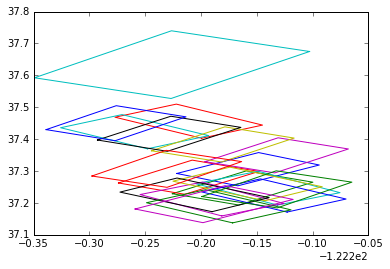

In [340]:
for itm in [f['geometry']['coordinates'][0] for f in items['features']]:
    x,y = zip(*itm)
    plt.plot(x,y)
#     break

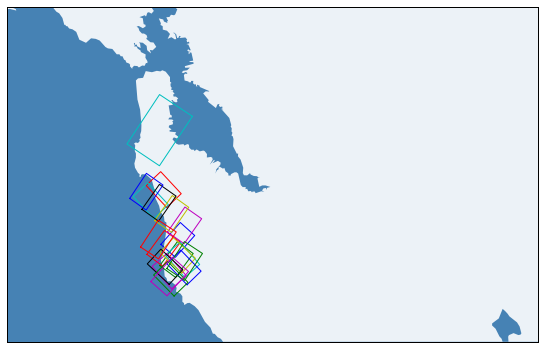

In [341]:
bbox = dict(north=38, west=-123, 
            south=37, east=-121)

plt.figure(figsize=(12,6))
m = Basemap(projection='merc',
            llcrnrlat=bbox['south'],urcrnrlat=bbox['north'],
            llcrnrlon=bbox['west'],urcrnrlon=bbox['east'],
            lat_ts=20,resolution='h')
m.drawmapboundary(fill_color='steelblue')
m.fillcontinents(color=(1,1,1,0.9),
                 lake_color='steelblue', zorder=-2)
# m.drawcoastlines()
# m.drawcountries()
# m.drawcoastlines()
# counties = m.drawcounties(linewidth=0.5)

# shpfile = '/Users/ajmendez/tmp/world/ca_latlon.shp'
# m.readshapefile(shpfile.replace('.shp',''), 'counties', drawbounds=False)

# for shape, record in zip(m.counties, m.counties_info):
#     x,y = zip(*shape)
#     name = record['TYPE']
#     if name in ['COASTLINE']:
#         plt.plot(x,y)

for itm in [f['geometry']['coordinates'][0] for f in items['features']]:
    lon,lat = zip(*itm)
    x,y = m(lon,lat)
    m.plot(x,y)


In [ ]:
# scene_ids = ['20151106_202551_0b0b']
# scene_ids = [f['id'] for f in items['features']]
scene_ids = [
    '20160213_212148_0b0d',
    '20160213_212516_0b07',
    '20160227_224704_0b07',
    '20151111_183515_0b0b',
]
# 20160208_232812_0b0a
outdir = '/Users/ajmendez/tmp/world/planet'
if not os.path.exists(outdir):
    os.makedirs(outdir)
callback = api.write_to_file(outdir)
bodies = client.fetch_scene_thumbnails(scene_ids, 
                                       size='lg', callback=callback)
for i,b in enumerate(bodies):
    b.await()

    
bodies = client.fetch_scene_geotiffs(scene_ids, 
                                           callback=callback)
for i,b in enumerate(bodies):
    b.await()


In [515]:
CACHE = {}

In [516]:
def get_scenes(point):
    loc = {
        'type':'Point', 
        'coordinates': point,
    }
#     scene_type = 'ortho'
    scene_type = 'landsat'
    filters = {
        'sat.off_nadir.leq': 39,
        'image_statistics.gsd.gte': 1,
        'image_statistics.gsd.lte': 18.7,
    #     'image_statistics_image_quality.gte':'target',
        'cloud_cover.estimated.gte': 0,
        'cloud_cover.estimated.lte': 10,
#         'published.gte':"2013-09-01T00:00:00.000Z",
        'acquired.gte':"2015-01-01T00:00:00.000Z",
    }
    scenes = client.get_scenes_list(scene_type=scene_type, 
                                    intersects=loc, 
                                    filters=filters, 
                                    )
    return scenes.get()

def get_all_scenes(points):
    
    for i, point in enumerate(points):
        key = tuple(point)
        if key in CACHE:
            continue
        CACHE[key] = get_scenes(key)
        if i%10 == 0:
            print i, len(CACHE)
#             break
get_all_scenes(points)

# tmp = {str(k):v for k,v in CACHE.iteritems()}
# json.dump(tmp,
#           open('/Users/ajmendez/tmp/world/california/ortho_points.json','w'),
#           indent=2)

tmp = {str(k):v for k,v in CACHE.iteritems()}
json.dump(tmp,
          open('/Users/ajmendez/tmp/world/california/landsat_points.json','w'),
          indent=2)

0 1
10 7
20 13
30 17
40 22
50 27
60 32
70 37
80 42
90 47
100 52
110 57
120 62
130 68
160 82
170 87
180 92
190 97
200 102
210 107
220 112
230 117
240 122
250 127
260 132
270 137
280 142
300 152
340 172
350 177
360 182


Found 34,174 images [9,550]


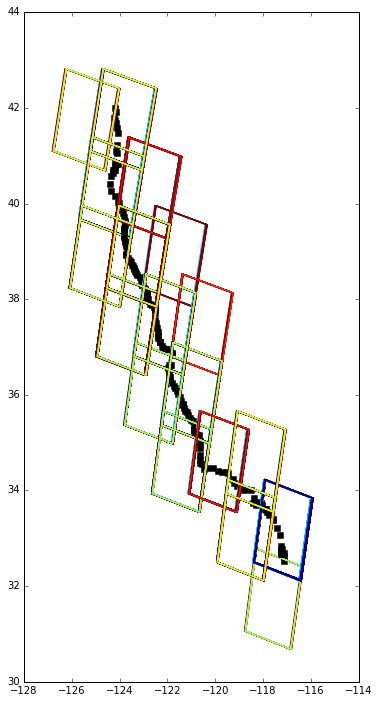

In [517]:
nscene = sum([len(s['features']) for s in CACHE.values()])
ntotal = sum([s['count'] for s in CACHE.values()])
print 'Found {:,d} images [{:,d}]'.format(ntotal, nscene)


vmin = date2num(datetime(2015,1,1))
vmax = date2num(datetime(2016,1,1))
norm = matplotlib.colors.Normalize(vmin, vmax)

plt.figure(figsize=(6,12))
for key, scenes in CACHE.iteritems():
    plt.plot(*key, marker='s', color='k', lw=0)
    
    for item in scenes['features']:
        geo = item['geometry']['coordinates']
        item['properties']['ndate'] = date2num(parser.parse(item['properties']['acquired']))
        
        x,y = zip(*geo[0])
        plt.plot(x,y, color=plt.cm.jet(norm(item['properties']['ndate'])))
#     pprint(item)
#     break

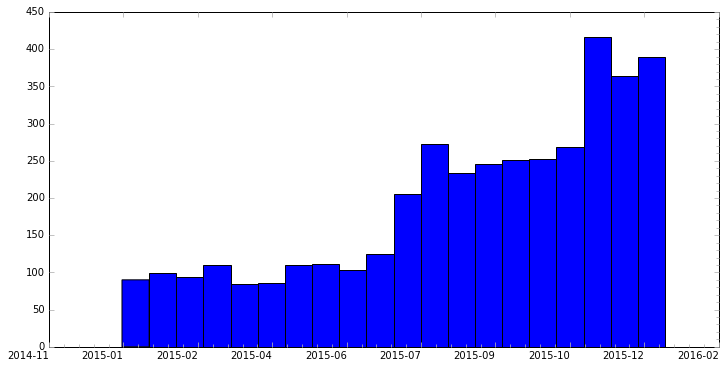

In [518]:
vmin = date2num(datetime(2015,1,1))
vmax = date2num(datetime(2016,1,1))

ndates = []
setup(figsize=(12,6))
for key, scenes in CACHE.iteritems():
    for item in scenes['features']:
        ndates.append(item['properties']['ndate'])
_ = plt.hist(ndates, np.linspace(vmin, vmax, 21))
dateticks('%Y-%m', rotation=0)

In [553]:
# mosaics = client.list_mosaics().get()
# [mosaic['name'] for mosaic in mosaics['mosaics']]
mosaics = [
     'open_california_re_20130901_20131130',
     'open_california_re_20131201_20140228',
     'open_california_re_20140101_20141231',
     'open_california_re_20140301_20140531',
     'open_california_re_20140601_20140831',
     'open_california_re_20140901_20141130',
     'open_california_re_20141201_20150228',
     'open_california_re_20150101_20151231',
     'open_california_re_20150301_20150531',
     'open_california_re_20150601_20150831'
]

CACHE = {}


In [572]:
def get_quads(mosaic, point):
    loc = {
        'type':'Point', 
        'coordinates': point,
    }
    quads = client.get_mosaic_quads(mosaic, intersects=loc)
    return quads.get()

def get_all_quads(mosaics, points):
    for mosaic in mosaics:
        for i,point in enumerate(points):
            key = '{} {}'.format(mosaic, tuple(point))
            if key in CACHE:
                continue
            CACHE[key] = get_quads(mosaic, tuple(point))
            CACHE[key]['point'] = tuple(point)
            if i%10 == 0:
                print i, len(CACHE)
#                 break
        break
get_all_quads(mosaics, points)

280 142
300 152
340 172
350 177
360 182


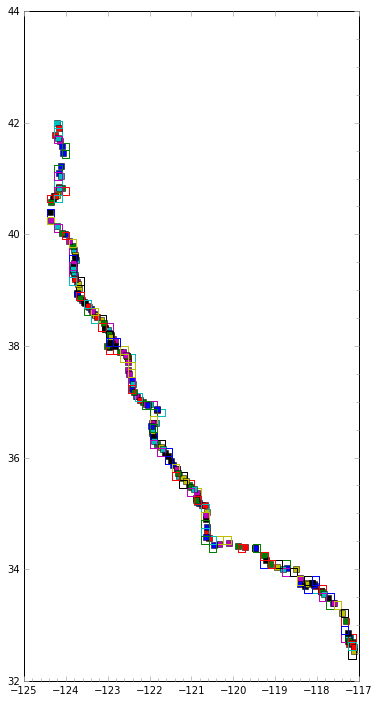

In [573]:
def plot_quads():
    setup(figsize=(6,12))
    for quads in CACHE.values():
        x,y = quads['point']
        plt.plot(x,y, 's')
        for quad in quads['features']:
            geo = quad['geometry']['coordinates'][0]
            x,y = zip(*geo)
            plt.plot(x,y)
#             pprint(quad)
#             return
plot_quads()

In [557]:
for quads in CACHE.values():
    print quads['point']
    break

(-124.25496172315829, 41.782104163222876)


In [583]:
'{}.tif'.format(ident)

'L15-0356E-1222N.tif'

In [592]:
for mosaic in mosaics:
    tmp = get_quads(mosaic, (-117.348, 32.917) )
    ident = tmp['features'][0]['id']
    
    # Ensure and outputdir
    outdir = '/Users/ajmendez/tmp/world/california/mosaics/{}/'.format(mosaic)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    # Ensure does not exist in cache
    outfile = os.path.join(outdir, '{}.tif'.format(ident))
    if os.path.exists(outfile):
        continue
    
    print 'Working on', mosaic, tmp['features'][0]['id']
    callback = api.write_to_file(outdir)
    bodies = client.fetch_mosaic_quad_geotiffs(mosaic, [ident], callback=callback)
    for i,b in enumerate(bodies):
        b.await()
    
    break

Working on open_california_re_20150601_20150831 L15-0356E-1222N
